In [4]:
import base64
import os

from PIL import Image
from openai import OpenAI

img_path = "2.jpg"
with open(img_path, 'rb') as img_file:
    img_base = base64.b64encode(img_file.read()).decode('utf-8')

# 初始化OpenAI客户端
client = OpenAI(
    api_key=os.getenv("ALIYUN_BAILIAN_API_KEY"),
    base_url="https://dashscope.aliyuncs.com/compatible-mode/v1"
)

reasoning_content = ""  # 定义完整思考过程
answer_content = ""  # 定义完整回复
is_answering = False  # 判断是否结束思考过程并开始回复
enable_thinking = True
# 创建聊天完成请求
completion = client.chat.completions.create(
    model="qwen3-vl-plus",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/png;base64,{img_base}"
                    },
                },
                {"type": "text", "text": "请识别这张图片中的文字，并说明图片中可能是什么场景？"},
            ],
        },
    ],
    stream=True,
    # enable_thinking 参数开启思考过程，thinking_budget 参数设置最大推理过程 Token 数
    extra_body={
        'enable_thinking': True,
        "thinking_budget": 81920},

    # 解除以下注释会在最后一个chunk返回Token使用量
    # stream_options={
    #     "include_usage": True
    # }
)

if enable_thinking:
    print("\n" + "=" * 20 + "思考过程" + "=" * 20 + "\n")

for chunk in completion:
    # 如果chunk.choices为空，则打印usage
    if not chunk.choices:
        print("\nUsage:")
        print(chunk.usage)
    else:
        delta = chunk.choices[0].delta
        # 打印思考过程
        if hasattr(delta, 'reasoning_content') and delta.reasoning_content != None:
            print(delta.reasoning_content, end='', flush=True)
            reasoning_content += delta.reasoning_content
        else:
            # 开始回复
            if delta.content != "" and is_answering is False:
                print("\n" + "=" * 20 + "完整回复" + "=" * 20 + "\n")
                is_answering = True
            # 打印回复过程
            print(delta.content, end='', flush=True)
            answer_content += delta.content

# print("=" * 20 + "完整思考过程" + "=" * 20 + "\n")
# print(reasoning_content)
# print("=" * 20 + "完整回复" + "=" * 20 + "\n")
# print(answer_content)



====================思考过程====================

用户需要识别图片中的文字并说明场景。首先，我要仔细看图片里的文字内容。图片是一个棕色的牌子，上面有中文和英文。

先读中文部分：“蒙山主峰，海拔1156米，为齐鲁第二高峰，故有‘亚岱’之誉。因状似神龟而得名，神龟头朝西北，尾列东南，俯卧于云天之际。峰顶东为玉皇殿，西有孔子小鲁处和迎客松。登临山巅，云海风涛，天地悠悠，顿时心旷神怡。”

然后是英文部分：“Guimeng Peak, the main peak of Mengshan Mountains with an altitude of 1,156m, is the second highest peak in Shandong Province and therefore is honored as 'Second Taishan'. It is so named because its shape is like a holy prone tortoise whose head is in northwest and tail southeast in the end of cloud and heaven. The east of the peak is Yuhuang Hall and the site of Confucius' Overlooking the Lu Country and Greeting Pine in the west. Climbing onto the top of the mountain, you will feel relaxed and happy immediately with sea of clouds and wave of wind.”

接下来要确认文字的准确性，有没有错别字。比如中文里“蒙山主峰”，英文里是“Guimeng Peak”，应该是蒙山主峰的拼音。海拔1156米，第二高峰，叫“亚岱”，英文是“Second Taishan”，泰山在山东，所以“岱”指泰山。

然后分析场景。牌子上有景点介绍，提到蒙山主峰，玉皇殿，孔子小鲁处，迎客松，这些是旅游景点的标志性地点。背景有树木，说明是在户外，可能是山上的景点介绍牌，游客可以了解该地点的信息。

所以总结：文字是景

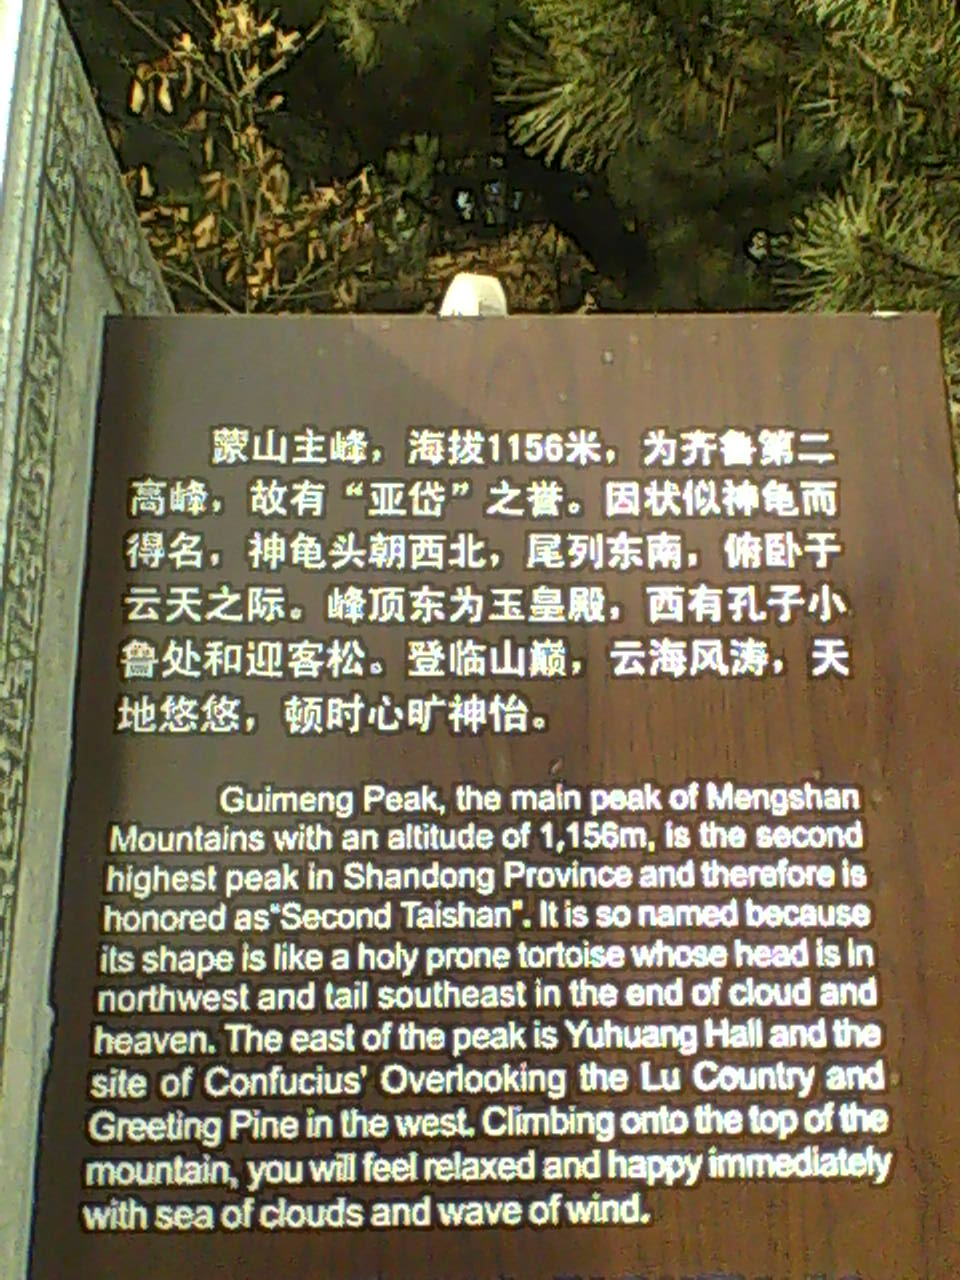

In [5]:
Image.open(img_path)